# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Loading Data

In [3]:
train = pd.read_csv(r'fashion-mnist_train.csv')
test = pd.read_csv(r'fashion-mnist_test.csv')

# Splitting into TEST and TRAIN

In [4]:
train_data = train.iloc[:,1:] 
train_label = train.iloc[:,0]
test_data = test.iloc[:,1:]
test_label = test.iloc[:,0]

# Before Normalization (shape of Data)

In [5]:
train_data.shape, train_label.shape

((60000, 784), (60000,))

In [6]:
test_data.shape,test_label.shape

((10000, 784), (10000,))

# Normalizing Data

In [7]:
train_data = np.array(train_data).reshape(60000,28,28,1)
test_data = np.array(test_data).reshape(10000,28,28,1)

train_data.shape, test_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_label = np.array(train_label).reshape(60000,1)
test_label = np.array(test_label).reshape(10000,1)

test_label.shape, train_label.shape

((10000, 1), (60000, 1))

# Name of Every Product by Number

In [9]:
names = {0 : 'T-shirt/top',1 : 'Trouser',2 : 'Pullover',3 : 'Dress',4 : 'Coat',5 : 'Sandal',
    6 : 'Shirt',7 : 'Sneaker',8 : 'Bag',9 : 'Ankle boot'}

# Visualizing Every Product

T-shirt/top


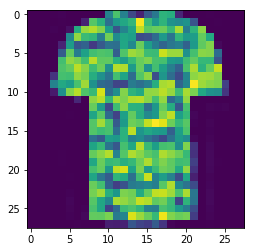

Trouser


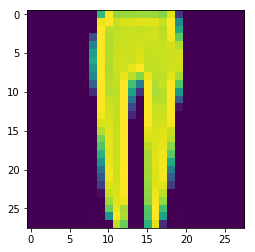

Pullover


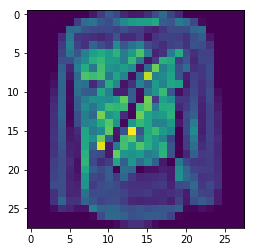

Dress


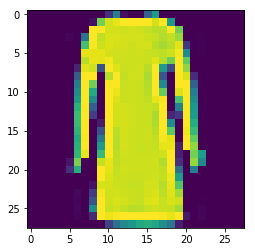

Coat


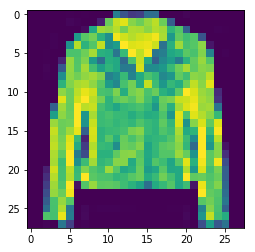

Sandal


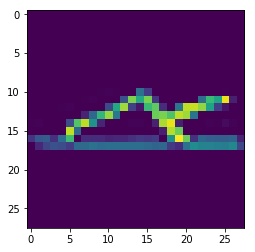

Shirt


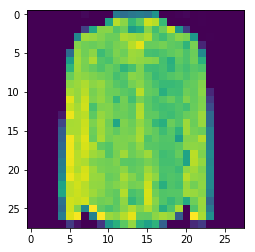

Sneaker


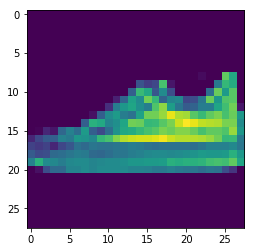

Bag


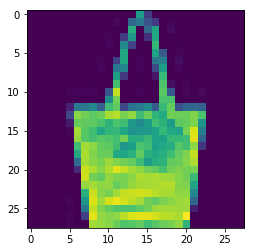

Ankle boot


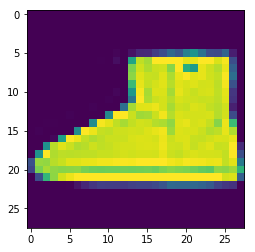

In [10]:
pic1 = 3
print(names[train_label[pic1][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic1].reshape((28,28)))
plt.show()

pic2 = 29
print(names[train_label[pic2][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic2].reshape((28,28)))
plt.show()

pic3 = 15
print(names[train_label[pic3][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic3].reshape((28,28)))
plt.show()

pic4 = 17
print(names[train_label[pic4][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic4].reshape((28,28)))
plt.show()

pic5 = 23
print(names[train_label[pic5][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic5].reshape((28,28)))
plt.show()

pic6 = 7
print(names[train_label[pic6][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic6].reshape((28,28)))
plt.show()

pic7 = 2
print(names[train_label[pic7][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic7].reshape((28,28)))
plt.show()

pic8 = 21
print(names[train_label[pic8][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic8].reshape((28,28)))
plt.show()

pic9 = 9
print(names[train_label[pic9][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic9].reshape((28,28)))
plt.show()

pic10 = 16
print(names[train_label[pic10][0]])
float_data = np.array(train_data,dtype='float32')
im = plt.imshow(float_data[pic10].reshape((28,28)))
plt.show()

# Creating Model

In [47]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([layers.Conv2D(filters = 32, kernel_size=3,activation='relu', 
                                         input_shape=(28,28,1)),
                           #layers.Conv2D(32, (3,3), activation='relu'),
                           layers.MaxPooling2D(pool_size=2),
                           layers.Dropout(0.25),
                           
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           #layers.MaxPooling2D((2, 2)),
                           
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')])

# Compiling Model

In [49]:
model.compile(loss= "sparse_categorical_crossentropy",optimizer ='adam',metrics=['accuracy'])

# Fitting Model

In [50]:
history = model.fit(train_data,train_label,epochs=10,batch_size = 500, validation_split=(0.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 42s 877us/sample - loss: 4.2036 - accuracy: 0.7032 - val_loss: 0.4646 - val_accuracy: 0.8323
Epoch 2/10
48000/48000 [==============================] - 31s 655us/sample - loss: 0.4347 - accuracy: 0.8406 - val_loss: 0.3770 - val_accuracy: 0.8603
Epoch 3/10
48000/48000 [==============================] - 31s 644us/sample - loss: 0.3698 - accuracy: 0.8619 - val_loss: 0.3507 - val_accuracy: 0.8729
Epoch 4/10
48000/48000 [==============================] - 32s 658us/sample - loss: 0.3342 - accuracy: 0.8751 - val_loss: 0.3350 - val_accuracy: 0.8811
Epoch 5/10
48000/48000 [==============================] - 32s 661us/sample - loss: 0.3012 - accuracy: 0.8877 - val_loss: 0.3120 - val_accuracy: 0.8896
Epoch 6/10
48000/48000 [==============================] - 31s 656us/sample - loss: 0.2746 - accuracy: 0.8958 - val_loss: 0.3168 - val_accuracy: 0.8891
Epoch 7/10
48000/48000 [====================

# Saving Model

In [74]:
model.save("model.h5")    

# Evaluating Model on Test Data

In [75]:
test_loss,test_acc = model.evaluate(test_data,test_label,verbose=2)

10000/1 - 2s - loss: 0.3175 - accuracy: 0.9009


# Visualizing Training and Validation Accuracy

[0.7032292, 0.8406042, 0.8619375, 0.8750833, 0.88772917, 0.89579165, 0.90314585, 0.9091667, 0.9166875, 0.92039585] [0.8323333, 0.8603333, 0.87291664, 0.8810833, 0.88958335, 0.8890833, 0.893, 0.8990833, 0.88691664, 0.8965] 0.9009


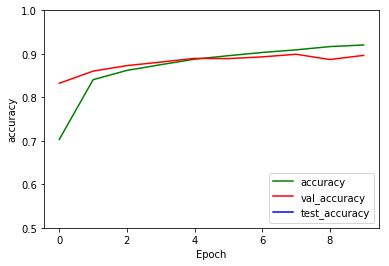

In [55]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
print(acc,val,test_acc)

plt.plot(acc,'g', label='accuracy')
plt.plot(val,'r', label = 'val_accuracy')
plt.plot(test_acc,'b', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1,])
plt.legend(loc='lower right')
plt.show()

# Visualizing Training and Validation Loss

[4.203598604847987, 0.4346968661993742, 0.3697680135567983, 0.3341830888142188, 0.3012355122094353, 0.27456160401925445, 0.25570311211049557, 0.23910196032375097, 0.2216812640738984, 0.20825365604832768] [0.4645611122250557, 0.3769765334824721, 0.350656658411026, 0.3350144885480404, 0.3120497291286786, 0.31676414236426353, 0.3098125296334426, 0.3070579996953408, 0.32957881813247997, 0.3085730659464995] 0.2943176763474941


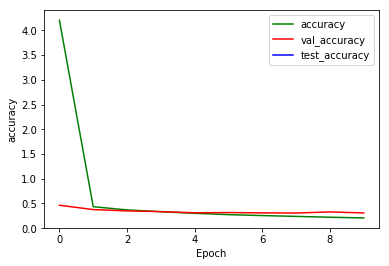

In [64]:
acc = history.history['loss']
val = history.history['val_loss']
print(acc,val,test_loss)

plt.plot(acc,'g', label='accuracy')
plt.plot(val,'r', label = 'val_accuracy')
plt.plot(test_acc,'b', label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
#plt.ylim([0.5, 1,])
plt.legend(loc='upper right')
plt.show()

### Here the predicted value of an image of a product from fashion mnist is given in probability of total number of products(which are 10). Means it is giving the best probability result from which it matches most. 

# Predicting random value from Train Data

In [65]:
float_data = np.array(train_data,dtype='float32')  
prediction1 = model.predict(float_data[546].reshape(1,28,28,1))
print(prediction1)

[[6.0356333e-06 3.9417614e-06 3.7779072e-03 1.2410137e-01 8.5038149e-01
  1.5170913e-11 2.1725547e-02 3.2965657e-12 3.7935106e-06 5.1275726e-09]]


# Predicting random value from Test Data

In [66]:
float_data = np.array(test_data,dtype='float32')  
prediction2 = model.predict(float_data[546].reshape(1,28,28,1))
print(prediction2)

[[2.0211792e-04 2.0836603e-06 1.9480794e-05 9.9864978e-01 9.1021141e-04
  1.4731921e-11 2.1604350e-04 1.7400218e-14 2.8662507e-07 3.6461194e-09]]


### For this i have make a function which indicates the biggest value's index number and passes through the label data to bring the actual best predicted value.

In [67]:
def check(n,data,label):
    
    #converts the data from integer to float
    float_data = np.array(data,dtype='float32')
    
    #predicting the given value
    prediction = model.predict(float_data[n].reshape(1,28,28,1))
    
    #this calculates the biggest value's index number
    a,d=0,0                                
    for i in prediction[0]:                
        if float(i)>a or float(i)==a:      
            a=i                            
            d=0                            
        elif float(i)<a:                   
            d=d+1    
    index = len(prediction[0])-d-1
    
    #here 'y' return's the actual name of the product
    y = label[n][0]
    
    predicted = names[index]
    actual = names[y]
    
    print(f'Predicted: {predicted}') 
    print(f'Actual: {actual} ')
    
    #showing the image 
    im = plt.imshow(float_data[n].reshape((28,28))) 
    plt.show()
    
    return predicted,actual

# Syntax:  check(number_of_value, data, data_label)

# Predicting a value from Train Data 

Predicted: Sneaker
Actual: Sneaker 


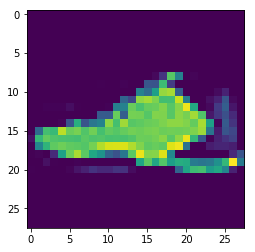

('Sneaker', 'Sneaker')

In [68]:
check(6650,train_data,train_label)   

# Predicting a value from Test Data

Predicted: Coat
Actual: Coat 


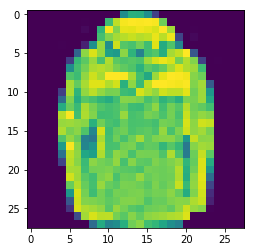

('Coat', 'Coat')

In [69]:
check(8582,test_data,test_label)

# Predicting Multiple random values with Accuray rate

Predicted: Ankle boot
Actual: Ankle boot 


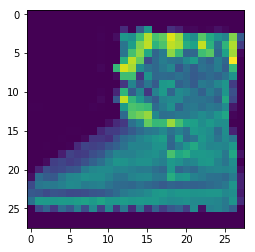

Predicted: Pullover
Actual: Shirt 


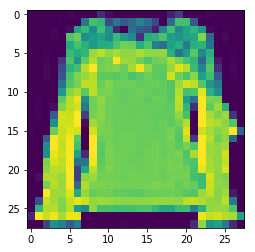

Predicted: Coat
Actual: Coat 


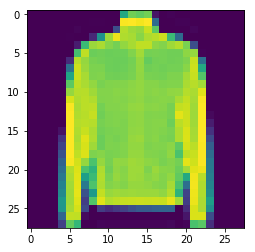

Predicted: Pullover
Actual: Coat 


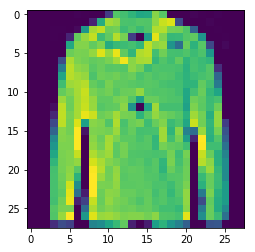

Predicted: Ankle boot
Actual: Ankle boot 


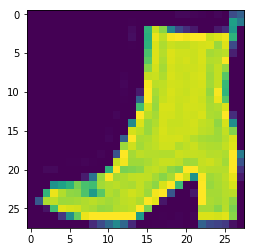

Predicted: Trouser
Actual: Trouser 


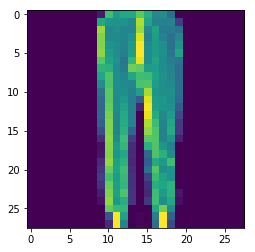

Predicted: Coat
Actual: Coat 


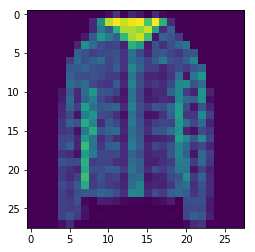

Predicted: Coat
Actual: Coat 


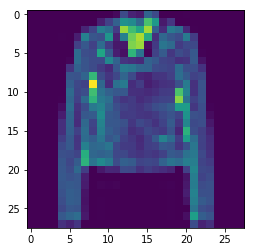

Predicted: Ankle boot
Actual: Ankle boot 


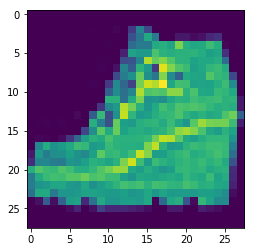

Predicted: Sneaker
Actual: Sneaker 


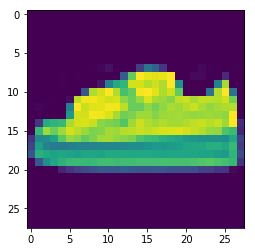

Predicted: Sandal
Actual: Sandal 


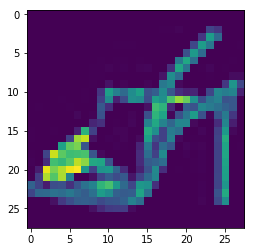

Predicted: Trouser
Actual: Trouser 


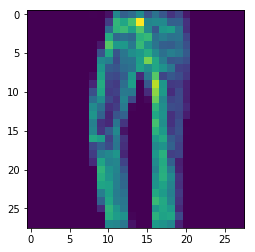

Predicted: Coat
Actual: Coat 


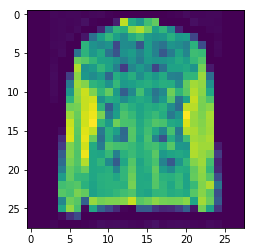

Predicted: Shirt
Actual: Shirt 


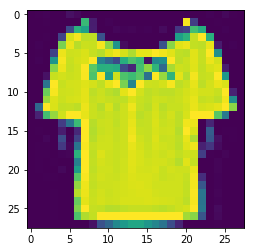

Predicted: Coat
Actual: Shirt 


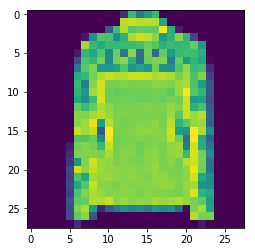

Predicted: Coat
Actual: Pullover 


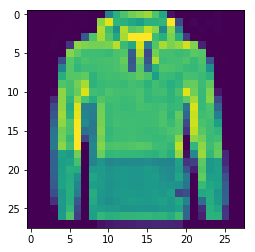

Predicted: Coat
Actual: Pullover 


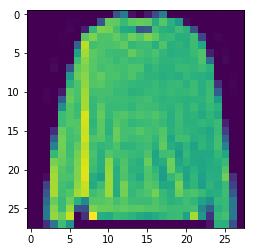

Predicted: Pullover
Actual: T-shirt/top 


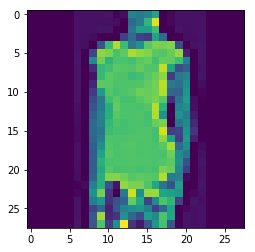

Predicted: Shirt
Actual: Shirt 


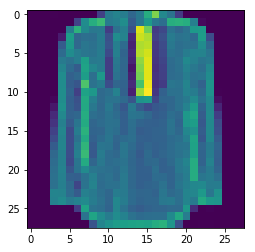

Predicted: Shirt
Actual: Shirt 


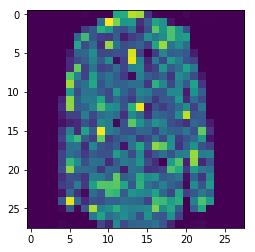

Predicted: Sneaker
Actual: Sneaker 


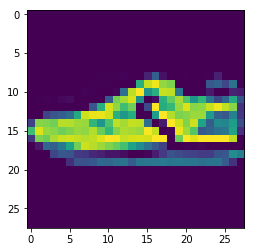

Predicted: Ankle boot
Actual: Ankle boot 


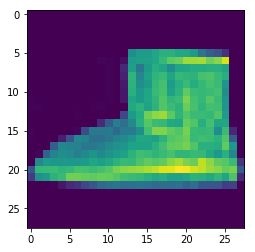

Predicted: Pullover
Actual: Pullover 


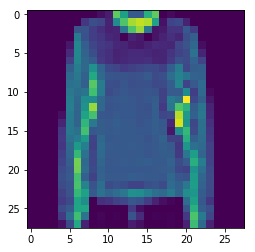

Predicted: Pullover
Actual: Pullover 


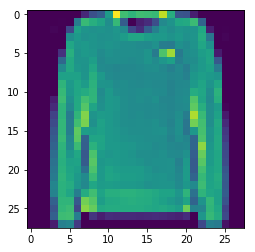

Predicted: Ankle boot
Actual: Ankle boot 


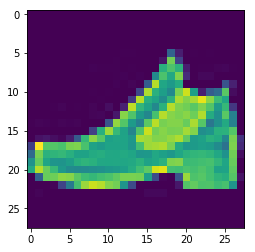

Predicted: Sandal
Actual: Sandal 


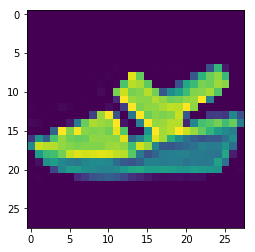

Predicted: Pullover
Actual: Pullover 


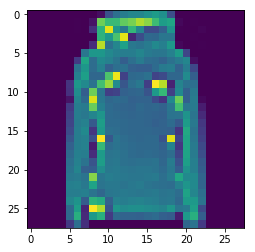

Predicted: Shirt
Actual: Shirt 


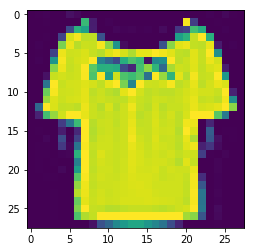

Predicted: Sandal
Actual: Sandal 


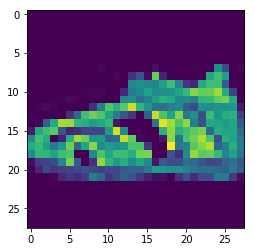

Predicted: Coat
Actual: Coat 


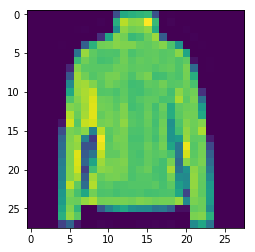

Predicted: Ankle boot
Actual: Ankle boot 


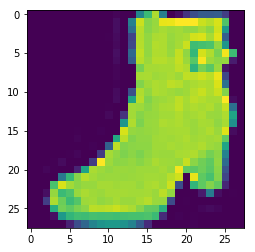

Predicted: Coat
Actual: Coat 


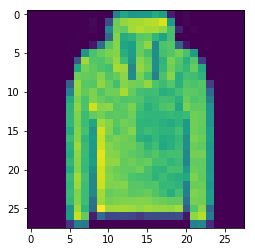

Predicted: Pullover
Actual: Pullover 


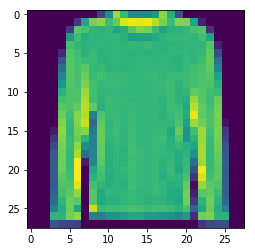

Predicted: Pullover
Actual: Pullover 


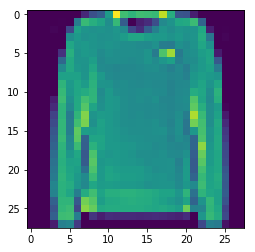

Predicted: T-shirt/top
Actual: T-shirt/top 


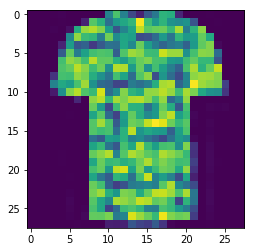

Predicted: Sneaker
Actual: Sneaker 


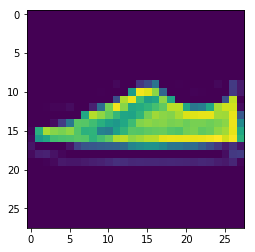

Predicted: Coat
Actual: Coat 


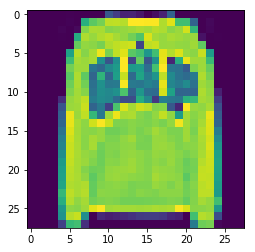

Predicted: Sneaker
Actual: Sneaker 


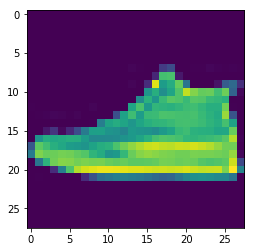

Predicted: Coat
Actual: Pullover 


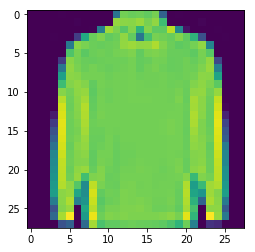

Predicted: Sneaker
Actual: Sneaker 


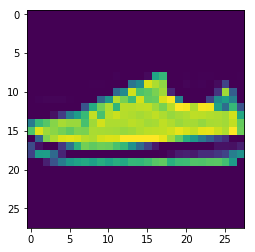

Predicted: Ankle boot
Actual: Ankle boot 


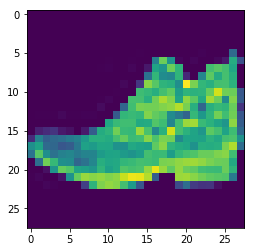

Predicted: Sandal
Actual: Sandal 


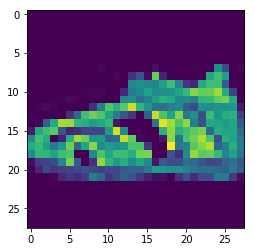

Accuracy: 83.33%
Wrong Predicted: 16.67%


In [80]:
random_values = [12,456,8999,52000,1050,3557,5689,4000,6222,7889,9999,8011,
                 5,90,6500,52004,1580,80,1120,158,10023,25002,35025,225,1,32,
                 85,90,45,55,67,89,81,225,3,32000,45001,5888,444,554,666,45]
result = []

a,b = 0,0

for value in random_values:
    pre,acl = check(value,train_data,train_label)
    if pre==acl:
        result.append(1)
        a= a+1
    else:
        result.append(0)
        b= b+1
        
acc_res = (a/len(result))*100
wp_res = (b/len(result))*100

print("Accuracy: %.2f"%acc_res + '%')
print("Wrong Predicted: %.2f" %wp_res +'%')        